# **Data Wrangling**
**Data Loading**




In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv("shopping_trends_updated.csv",skiprows=1)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [ ]:
# Rename columns to short names for easier analysis
df = df.rename(columns={
    'Purchase Amount (USD)': 'Purchase_Amount',
    'Review Rating': 'Review_Rating',
    'Subscription Status': 'Subscription_Status',
    'Promo Code Used': 'Promo_Code',
    'Previous Purchases': 'Previous_Purchases',
    'Payment Method': 'Payment_Method',
    'Frequency of Purchases': 'Frequency'
})
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase_Amount,Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping Type,Discount Applied,Promo_Code,Previous_Purchases,Payment_Method,Frequency
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [ ]:
# Drop ID column
df = df.drop(columns=['Customer ID'])


In [ ]:
# Check for any missing values in the dataset
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Age                    0
Gender                 0
Item Purchased         0
Category               0
Purchase_Amount        0
Location               0
Size                   0
Color                  0
Season                 0
Review_Rating          0
Subscription_Status    0
Shipping Type          0
Discount Applied       0
Promo_Code             0
Previous_Purchases     0
Payment_Method         0
Frequency              0
dtype: int64


# **Data projection**

In [ ]:
# Display the number of rows and columns
df.shape

(3900, 17)

In [ ]:
# Display the first 5 rows only of the data frame
df.head()

,Age,Gender,Item Purchased,Category,Purchase_Amount,Location,Size,Color,Season,Review_Rating,Subscription_Status,Shipping Type,Discount Applied,Promo_Code,Previous_Purchases,Payment_Method,Frequency
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
# Display rows 1 to 15 from the columns YrSold to SalePrice
df.loc[1:15, 'Item Purchased':'Location']

,Item Purchased,Category,Purchase_Amount,Location
1,Sweater,Clothing,64,Maine
2,Jeans,Clothing,73,Massachusetts
3,Sandals,Footwear,90,Rhode Island
4,Blouse,Clothing,49,Oregon
5,Sneakers,Footwear,20,Wyoming
6,Shirt,Clothing,85,Montana
7,Shorts,Clothing,34,Louisiana
8,Coat,Outerwear,97,West Virginia
9,Handbag,Accessories,31,Missouri
10,Shoes,Footwear,34,Arkansas


In [ ]:
# Display the columns in the House prices Data frame
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase_Amount',
       'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Shipping Type', 'Discount Applied',
       'Promo_Code', 'Previous_Purchases', 'Payment_Method', 'Frequency'],
      dtype='object')

In [ ]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase_Amount,3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Review_Rating,3900.0,3.749949,0.716223,2.5,3.1,3.7,4.4,5.0
Previous_Purchases,3900.0,25.351538,14.447125,1.0,13.0,25.0,38.0,50.0


In [ ]:
#descriptive statistics of Purchase_Amount
df['Purchase_Amount'].describe()


,Purchase_Amount
count,3900.000000
mean,59.764359
std,23.685392
min,20.000000
25%,39.000000
50%,60.000000
75%,81.000000
max,100.000000


**6.	Create a script to develop a Python function for descriptive statistics. The input for the function should be the sample and the field to perform the descriptive statistics. 9**

In [ ]:
# Create a descriptive statistics function
def Desc_stat(ds, var):
    print('The average of', var, 'is:', round(ds[var].mean(), 2))
    print('The standard deviation of', var, 'is:', round(ds[var].std(), 2))
    print('The mode of', var, 'is:', ds[var].mode()[0])
    print('The median of', var, 'is:', ds[var].median())
    print('The minimum of', var, 'is:', ds[var].min())
    print('The maximum of', var, 'is:', ds[var].max())
    print('The range of', var, 'is:', ds[var].max() - ds[var].min())
    print('Q1:', ds[var].quantile(0.25))
    print('Q2 (Median):', ds[var].quantile(0.50))
    print('Q3:', ds[var].quantile(0.75))
    print('Interquartile Range (IQR):', ds[var].quantile(0.75) - ds[var].quantile(0.25))


In [ ]:
 Desc_stat(df,'Purchase_Amount')

The average of Purchase_Amount is: 59.76
The standard deviation of Purchase_Amount is: 23.69
The mode of Purchase_Amount is: 32
The median of Purchase_Amount is: 60.0
The minimum of Purchase_Amount is: 20
The maximum of Purchase_Amount is: 100
The range of Purchase_Amount is: 80
Q1: 39.0
Q2 (Median): 60.0
Q3: 81.0
Interquartile Range (IQR): 42.0


<Axes: >

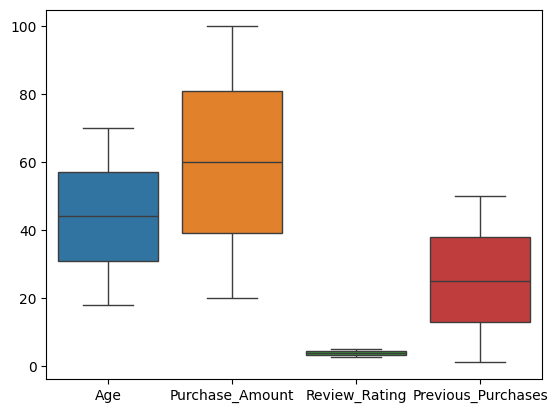

In [ ]:
sns.boxplot(df)

**7.	Create a program to random sampling of size 150 and find the descriptive statistics for the dependent variable from the sample [Apply the descriptive function which you created].**

In [ ]:
sample = df.sample(n=150, replace=False,random_state=42)
Desc_stat(sample, 'Purchase_Amount')


The average of Purchase_Amount is: 58.36
The standard deviation of Purchase_Amount is: 23.6
The mode of Purchase_Amount is: 36
The median of Purchase_Amount is: 58.0
The minimum of Purchase_Amount is: 20
The maximum of Purchase_Amount is: 100
The range of Purchase_Amount is: 80
Q1: 36.25
Q2 (Median): 58.0
Q3: 77.0
Interquartile Range (IQR): 40.75


**8.	Create a script for systematic sampling by giving certain conditions and finding the desc stat for the dependent variable from the sample [Apply the descriptive function which you created].**

In [ ]:
# Every 25th record from the dataset
step = 25
systematic_sample = df.iloc[::step]

#Apply the descriptive statistics function to Purchase_Amount
Desc_stat(systematic_sample, 'Purchase_Amount')


The average of Purchase_Amount is: 61.59
The standard deviation of Purchase_Amount is: 24.9
The mode of Purchase_Amount is: 26
The median of Purchase_Amount is: 64.0
The minimum of Purchase_Amount is: 20
The maximum of Purchase_Amount is: 100
The range of Purchase_Amount is: 80
Q1: 37.75
Q2 (Median): 64.0
Q3: 85.0
Interquartile Range (IQR): 47.25


**10.	Visualize the dependent variable by the Graph/Chart of the following using Python Program:
a.	Scatter plot
b.	Box Plot
c.	Histogram
d.	Heat Map
Hint: Use Matplot or Ski-learn library
** **bold text**

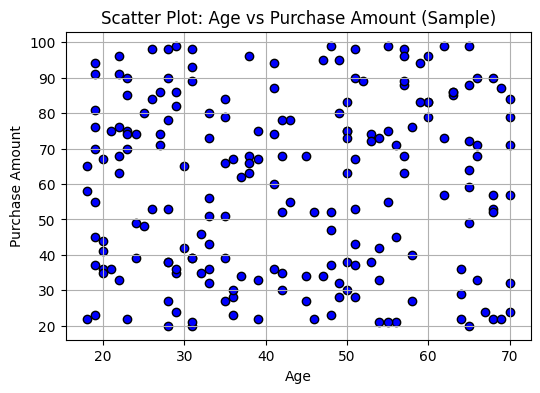

In [ ]:
#scatter plot age vs 'Purchase_Amount   (we used a sample of 200 to aviod overcrowding )

sample = df.sample(n=200, random_state=1)
plt.figure(figsize=(6, 4))
plt.scatter(sample['Age'], sample['Purchase_Amount'], color='blue', edgecolor='black')
plt.title('Scatter Plot: Age vs Purchase Amount (Sample)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.show()



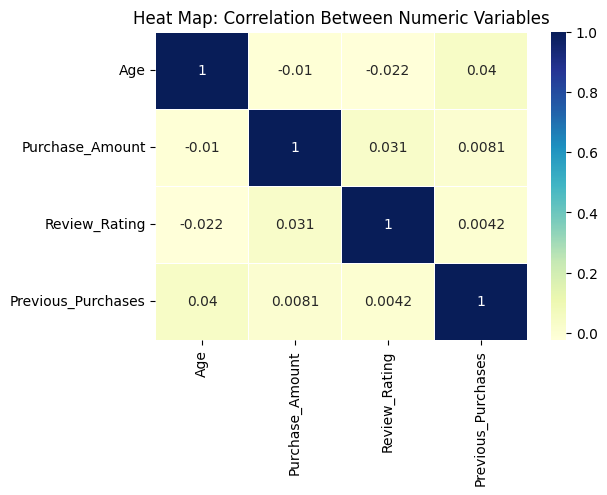

In [ ]:
# Heatmap of correlation among numeric features
plt.figure(figsize=(6, 4))
corr_matrix = df[['Age', 'Purchase_Amount', 'Review_Rating', 'Previous_Purchases']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heat Map: Correlation Between Numeric Variables')
plt.show()


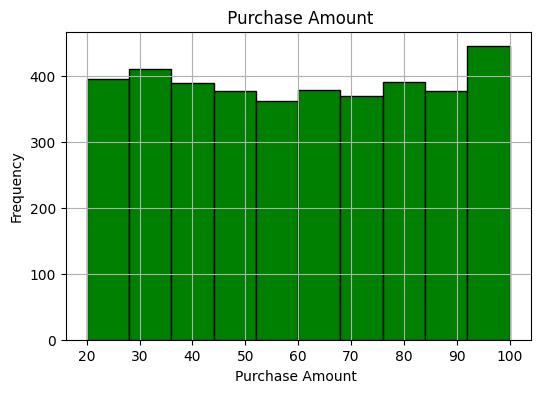

In [ ]:
# Histogram of Purchase_Amount
plt.figure(figsize=(6, 4))
plt.hist(df['Purchase_Amount'], bins=10, color='green', edgecolor='black')
plt.title(' Purchase Amount')
plt.xlabel('Purchase Amount ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



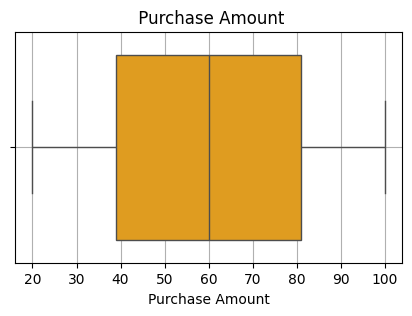

In [ ]:
# Box plot of Purchase_Amount
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Purchase_Amount'], color='orange')
plt.title(' Purchase Amount')
plt.xlabel('Purchase Amount')
plt.grid(True)
plt.show()


**11.	Perform the hypothesis test to find the correlation (Pearson and Spearman for numerical variable and chi-square test for categorical variable) between the independent variable and the dependent variable.
Note: If you have more than one independent variable, then chose any one of the independent variables.
**bold text**

In [ ]:

# Dependent Variable: Purchase_Amount

1.# Pearson Correlation (Numerical - Age vs Purchase Amount)
r_pearson, p_pearson = pearsonr(df['Age'], df['Purchase_Amount'])
print("Pearson Correlation Coefficient (Age vs Purchase_Amount):", r_pearson)
print("P-value:", p_pearson)

# ----------- 2. Spearman Correlation (Numerical - Age vs Purchase Amount) -----------
r_spearman, p_spearman = spearmanr(df['Age'], df['Purchase_Amount'])
print("Spearman Correlation Coefficient (Age vs Purchase_Amount):", r_spearman)
print("P-value:", p_spearman)

# ----------- 3. Chi-Square Test (Categorical - Subscription Status vs Shipping Type) -----------
# Create a contingency table
contingency_table = pd.crosstab(df['Subscription_Status'], df['Shipping Type'])

# Apply chi-square test
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test between Subscription_Status and Shipping_Type:")
print("Chi-Square Value:", chi2)
print("P-value:", p_chi)


Pearson Correlation Coefficient (Age vs Purchase_Amount): -0.010423647378686531
P-value: 0.515197824122489
Spearman Correlation Coefficient (Age vs Purchase_Amount): -0.010444519559151589
P-value: 0.514356833416039
Chi-Square Test between Subscription_Status and Shipping_Type:
Chi-Square Value: 6.300602351974799
P-value: 0.27805797565678847


**12.	Assess the performance of the dependent variable to know whether the sample is representative of the normal population by a one-sample t-test.**

In [ ]:
# Define the population (full Purchase_Amount column)
population = df['Purchase_Amount']
print("Population Mean:", population.mean())

# Define the sample (only users with Subscription_Status == 'Yes')
sample = df[df['Subscription_Status'] == 'Yes']['Purchase_Amount']
print("Sample Mean:", sample.mean())
print("Sample Size:", len(sample))

#  Check normality using Shapiro-Wilk test
stat, p_shapiro = shapiro(sample)
print("\nShapiro-Wilk Test Statistic:", stat)
print("Shapiro-Wilk P-value:", p_shapiro)

if p_shapiro > 0.05:
    print("Conclusion: Sample is normally distributed.")
else:
    print("Conclusion: Sample is NOT normally distributed.")

#  Perform the one-sample t-test
t_stat, p_ttest = ttest_1samp(sample, population.mean())
print("\nOne-Sample T-Test")
print("T-Statistic:", t_stat)
print("P-value:", p_ttest)

#  Interpret the result
if p_ttest < 0.05:
    print("Conclusion: Reject the null hypothesis.")
    print("The sample mean is significantly different from the population mean.")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("The sample mean is NOT significantly different from the population mean.")



Population Mean: 59.76435897435898
Sample Mean: 59.49192782526116
Sample Size: 1053

Shapiro-Wilk Test Statistic: 0.9513782579551509
Shapiro-Wilk P-value: 3.6003588769259164e-18
Conclusion: Sample is NOT normally distributed.

One-Sample T-Test
T-Statistic: -0.3769898830272022
P-value: 0.7062571537328659
Conclusion: Fail to reject the null hypothesis.
The sample mean is NOT significantly different from the population mean.


14. Develop a script to forecast the value of the dependent variable from all the relevant independent variables using Multiple Linear Regression

# **Simple** **Regression**

In [ ]:
# Independent variable (X) and dependent variable (y)
X = df[['Age']]
y = df['Purchase_Amount']


In [ ]:
#Split the dataset into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Age
57     21
2540   24
1256   45
2034   61
686    70
...   ...
835    35
3264   28
1653   31
2607   41
2732   21

[3120 rows x 1 columns]
      Age
1951   33
1550   66
31     33
3171   68
1044   39
...   ...
1343   68
2572   54
3880   42
2856   65
3583   52

[780 rows x 1 columns]
57      64
2540    42
1256    48
2034    30
686     35
        ..
835     26
3264    50
1653    93
2607    36
2732    75
Name: Purchase_Amount, Length: 3120, dtype: int64
1951    53
1550    26
31      79
3171    26
1044    30
        ..
1343    56
2572    42
3880    20
2856    48
3583    77
Name: Purchase_Amount, Length: 780, dtype: int64


In [ ]:
# Instantiating /fitting the linear regressor to our X and y data
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
#using the fitted model to predict the Purchase Amount
y_pred = regressor.predict(X_test)


In [ ]:
#predicting a specific value and printing results
predicted_value = regressor.predict([[30]])
print("Predicted Purchase Amount for Age 30:", predicted_value[0])


Predicted Purchase Amount for Age 30: 60.152239661081154


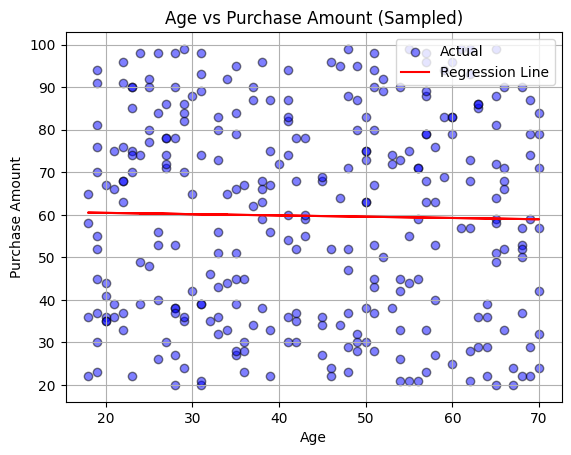

In [ ]:
# scatter plot  of a sample age and purchase amount
sample = df.sample(n=300, random_state=1)
X_sample = sample[['Age']]
y_sample = sample['Purchase_Amount']


plt.scatter(X_sample, y_sample, color='blue', alpha=0.5, edgecolor='black', label='Actual')
plt.plot(X_sample, regressor.predict(X_sample), color='red', label='Regression Line')
plt.title('Age vs Purchase Amount (Sampled)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.legend()
plt.grid(True)
plt.show()



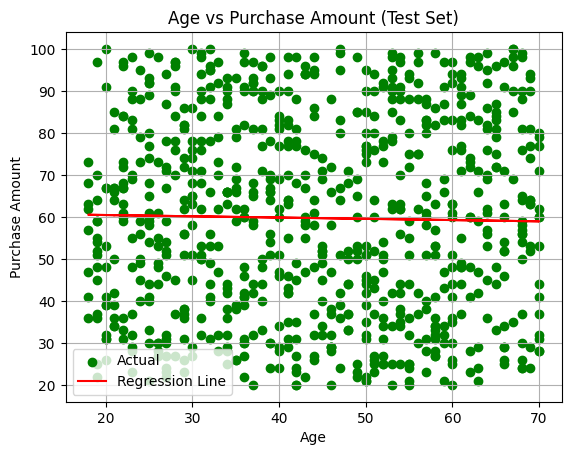

In [ ]:
# scatter plot  of a test set
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_train, regressor.predict(X_train), color='red', label='Regression Line')
plt.title('Age vs Purchase Amount (Test Set)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Final Linear Regression Equation
intercept = regressor.intercept_
slope = regressor.coef_[0]

print(f"Final Linear Regression Equation:")
print(f"Purchase_Amount = {intercept:.2f} + {slope:.2f} * Age")


Final Linear Regression Equation:
Purchase_Amount = 61.05 + -0.03 * Age


## **Multiple Linear Regression**

In [ ]:
# Independent variable (X) and dependent variable (y)
X = df[['Age', 'Review_Rating', 'Previous_Purchases']]
y = df['Purchase_Amount']


In [ ]:
#Split the dataset into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Instantiating /fitting the multiple  regressor to our X and y data
mregressor = LinearRegression()
mregressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
#using the fitted model to predict the Purchase Amount
y_pred = mregressor.predict(X_test)


In [ ]:
# Example: predict for Age=30, Rating=4.0, Previous Purchases=20
predicted_value = mregressor.predict([[30, 4.0, 20]])
print("Predicted Purchase Amount:", predicted_value[0])


Predicted Purchase Amount: 60.27692853783947


In [ ]:
#printing the results + equation
intercept = mregressor.intercept_
coefficients = mregressor.coef_

print("Intercept (a):", intercept)
print("Coefficients (b1, b2, ...):", coefficients)

# Example: if you used Age, Rating, Previous_Purchases
print(f"Purchase_Amount = {intercept:.2f} + ({coefficients[0]:.2f} * Age) + ({coefficients[1]:.2f} * Review_Rating) + ({coefficients[2]:.2f} * Previous_Purchases)")


Intercept (a): 57.75374457496037
Coefficients (b1, b2, ...): [-0.02893663  0.79053901  0.01145634]
Purchase_Amount = 57.75 + (-0.03 * Age) + (0.79 * Review_Rating) + (0.01 * Previous_Purchases)


### **15.	Predict the value of the dependent variable from the different classifier such as Logistic Regression, KNN, Naïve-Bayes and Decision Tree.**

# **Logistic Regression**

In [ ]:

df = df.dropna()  # Drop missing values
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Convert Purchase_Amount into binary classes: Low = 0, High = 1
df['Purchase_Class'] = pd.qcut(df['Purchase_Amount'], q=2, labels=[0, 1])  # 2 quantiles = binary


In [ ]:
#  Split features and labels
X = df.drop(['Purchase_Amount', 'Purchase_Class'], axis=1)
y = df['Purchase_Class']

In [ ]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#  Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#training the logistic regressor using the X_train and y_trainodel = LogisticRegression()

model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
# Step 6: Predict
y_pred = model.predict(X_test)

In [ ]:
 #Calculate the/ generate  metrics
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("Recall:", rec)
print("Precision:", prec)

Confusion Matrix:
 [[229 169]
 [215 167]]
Accuracy: 0.5076923076923077
Recall: 0.43717277486910994
Precision: 0.49702380952380953


# **KNN**

In [ ]:
##Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Training the KNN using the X_train and y_train
classifier1 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Predict
y_pred = classifier1.predict(X_test)

In [ ]:
#Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[274 124]
 [238 144]]


0.5358974358974359

In [ ]:
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("Precision:", precision_score(y_test, y_pred, average='binary'))


KNN Confusion Matrix:
 [[274 124]
 [238 144]]
Accuracy: 0.5358974358974359
Recall: 0.3769633507853403
Precision: 0.5373134328358209


# **Naïve-Bayes**

In [ ]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
 #Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Training the naive bayes using the X_train and y_train
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#predict
y_pred_nb = classifier_nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_nb)
acc = accuracy_score(y_test, y_pred_nb)

In [ ]:
#printing results
print("Naive Bayes Confusion Matrix:\n", cm)
print("Accuracy:", acc)

Naive Bayes Confusion Matrix:
 [[227 171]
 [218 164]]
Accuracy: 0.5012820512820513


# **Decision Tree**

In [ ]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
 #Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Training the Decision Tree using the X_train and y_train
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
#Predicting
y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
acc = accuracy_score(y_test, y_pred_dt)

In [ ]:
#printing the results
print("Decision Tree Confusion Matrix:\n", cm)
print("Accuracy:", acc)

Decision Tree Confusion Matrix:
 [[213 185]
 [209 173]]
Accuracy: 0.4948717948717949


## **18.	Perform the cluster analysis such as K-means and Horizontal for any field from the chosen dataset.**

In [ ]:
#select the clustering columns
X = df[['Age', 'Purchase_Amount']].values
X

array([[55, 53],
       [19, 64],
       [50, 73],
       ...,
       [46, 33],
       [44, 77],
       [52, 81]])

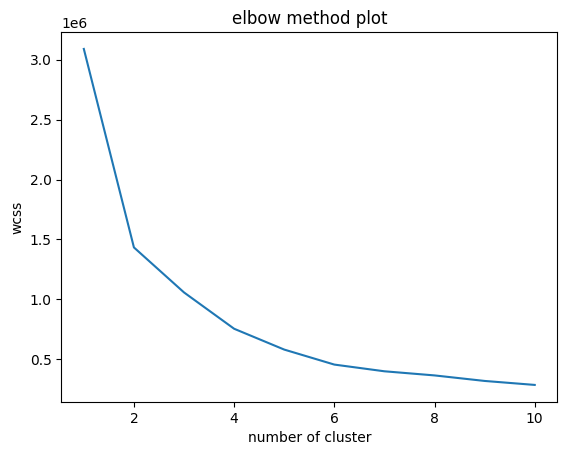

In [ ]:
#clearing the elbow plot
wcss_list = []
for k in range(1, 11):
  kmeans = KMeans(k)
  kmeans.fit(X)
  wcss = kmeans.inertia_
  wcss_list.append(wcss)

plt.plot(range(1, 11),wcss_list)
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.title("elbow method plot")
plt.show()

In [ ]:
#fit the clustering model with 5 clusters
kmeans = KMeans (n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 0, 4, ..., 1, 0, 2], dtype=int32)

In [ ]:
#Apply the K-means model on the Training set
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 2, 1, ..., 3, 2, 0], dtype=int32)

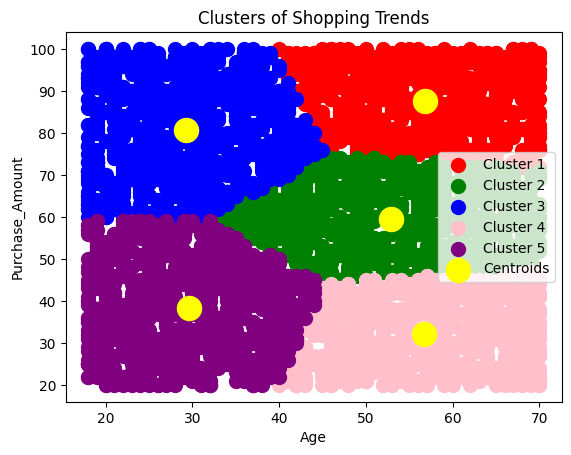

In [ ]:
#plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c ='red', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c ='green', label ='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c ='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c ='pink', label ='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c ='purple', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Shopping Trends')
plt.xlabel('Age')
plt.ylabel('Purchase_Amount')
plt.legend()
plt.show()

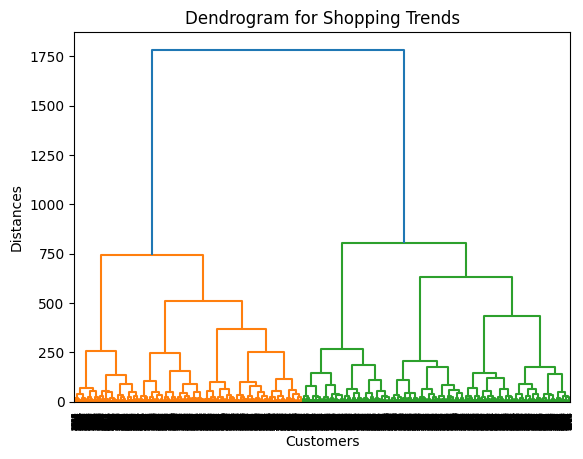

In [ ]:
#Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method ='ward'))
plt.title('Dendrogram for Shopping Trends')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

In [ ]:
#Training the Hierarchical Clustering model on the dataset
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

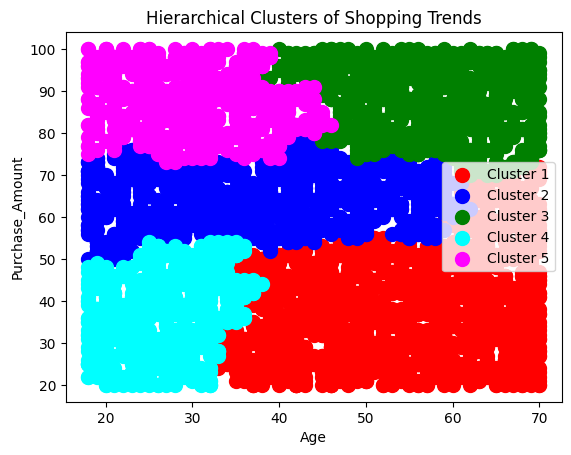

In [ ]:
#Visualise the Cluster
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Hierarchical Clusters of Shopping Trends')
plt.xlabel('Age')
plt.ylabel('Purchase_Amount')
plt.legend()
plt.show()

In [1]:
print("Updated by Step 25")


Updated by Step 25


Step 6 completed


In [ ]:
!ls /content


sample_data  shopping_trends_updated.csv
